In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# Load prices
df = pd.read_csv("../data/merged.csv", index_col=0, parse_dates=True)

# Make sure all columns are numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Drop any rows with NaNs
df = df.dropna()

print("Loaded and cleaned prices:")
print(df.head())

Loaded and cleaned prices:
               ES=F     NQ=F
Price                       
2015-01-02  2046.25  4214.25
2015-01-05  2016.00  4161.75
2015-01-06  1994.50  4102.25
2015-01-07  2019.50  4151.50
2015-01-08  2055.00  4232.25


/var/folders/jb/pk23bkyn13b2jj0ptqjmbskr0000gn/T/ipykernel_12172/1333429786.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("../data/merged.csv", index_col=0, parse_dates=True)


In [28]:
# Load signals
signals = pd.read_csv("../outputs/signals.csv", index_col=0, parse_dates=True)
signals = signals.squeeze()  # Convert DataFrame to Series if needed

# Confirm alignment
signals = signals.loc[df.index]

# Parameters
beta = 1.1  # Use your estimated hedge ratio
capital = 100000  # starting capital in dollars
position_size = 1  # Number of contracts (or units) per trade

In [29]:
# Compute spread
spread = df["ES=F"] - beta * df["NQ=F"]

# Compute spread returns
spread_returns = spread.diff()

In [30]:
# Create position series: signals lagged by 1 day
positions = signals.shift(1).fillna(0)

# Daily PnL
daily_pnl = positions * spread_returns * position_size

# Cumulative PnL
cumulative_pnl = daily_pnl.cumsum() + capital

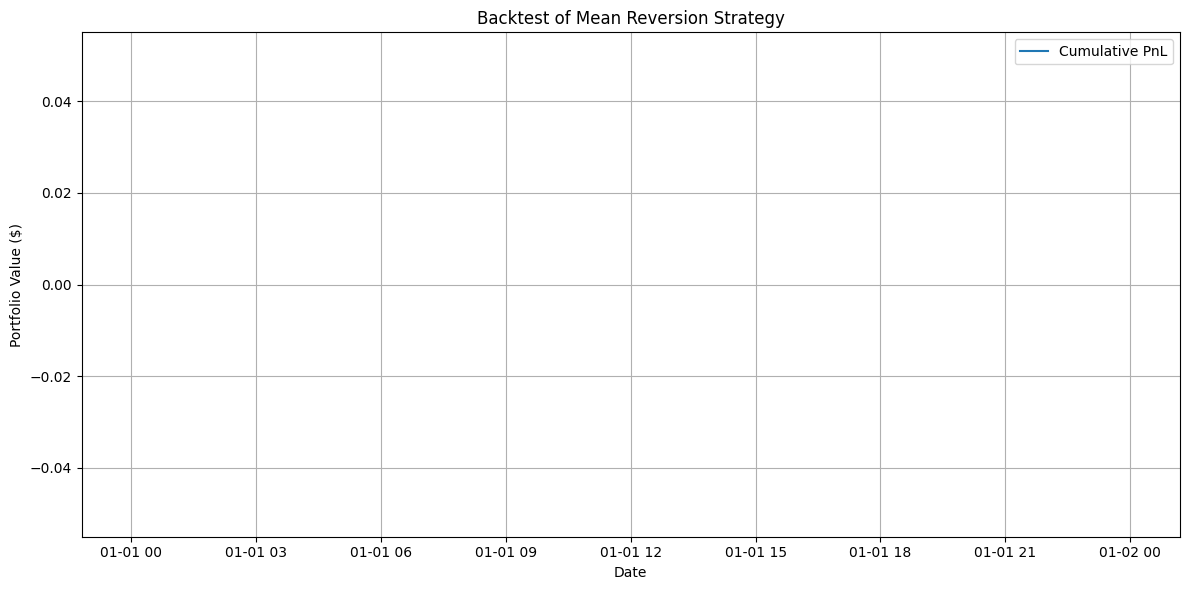

In [31]:
# Plot cumulative PnL
plt.figure(figsize=(12,6))
plt.plot(cumulative_pnl, label="Cumulative PnL")
plt.title("Backtest of Mean Reversion Strategy")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
total_return = cumulative_pnl.iloc[-1] - capital
annualized_return = total_return / (len(cumulative_pnl) / 252)
annualized_vol = daily_pnl.std() * np.sqrt(252)

print(f"Total return: ${total_return:,.2f}")
print(f"Annualized return: ${annualized_return:,.2f}")
print(f"Annualized volatility: ${annualized_vol:,.2f}")

Total return: $nan
Annualized return: $nan
Annualized volatility: $nan
